In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))


In [4]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(2, activation='linear')(x) # вектор скрытого состояния из 2х нейронов

input_enc = Input(shape=(2,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

In [5]:
encoder = keras.Model(input_img, encoded, name="encoder") # модель кодера
decoder = keras.Model(input_enc, decoded, name="decoder") # модель декодера
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name="autoencoder") # при обучении у нас в конце автоматически 
# получится обученный кодер и декодер 
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True)

Epoch 1/10
938/938 [==============================] - 4s 2ms/step - loss: 0.0600
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0490
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0463
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0452
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0444
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0438
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0434
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0429
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0426
Epoch 10/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0423


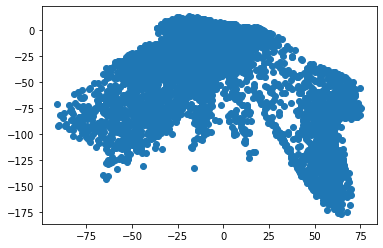

In [7]:
h = encoder.predict(x_test) # распределение точек векторов скрытово состояния для тестового набора изображений
# характерная картина формирования модельной области отображения входного сигнала в пространство скрытого состояния
a = plt.scatter(h[:, 0], h[:, 1])

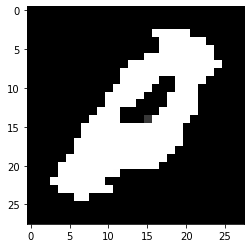

In [10]:
img = decoder.predict(np.expand_dims([10, 10], axis=0))
plt.imshow(img.squeeze(), cmap='gray')